<a href="https://colab.research.google.com/github/Nikhil07-source/Machine_Learning_Algorithms/blob/main/Logistic_Regression_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nikhil07-source/Datasets/refs/heads/main/diabetes.csv')
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.Outcome.value_counts(normalize=True) #Used for getting percentage

#0 = 65.1% = Majority Class
#1 = 34.8% = Minority Class

,proportion
Outcome,
0,0.651042
1,0.348958


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Do EDA part properly by creating graphs, plots, charts n all.

#Logistic Regression - taking only 3 features 'Pregnancies', 'Glucose', 'BloodPressure'

### Choosing X and Y

In [ ]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure']]

y = df[['Outcome']]

### Splitting data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split  #using sklearn library to split dataframe in train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

print('X Train shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)
print('y Train shape: ', y_train.shape)
print('y Test shape: ', y_test.shape)

X Train shape:  (614, 3)
X Test shape:  (154, 3)
y Train shape:  (614, 1)
y Test shape:  (154, 1)


##Importing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)      #training of model/ fitting of model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##Doing Prediction for Train Data

###Getting probability of y(0,1) on train data. We don't have to do this manually because we have functions to do it directly.

In [ ]:
train_prob = log_reg.predict_proba(X_train)
train_prob

#Explaination
#[0.75328526, 0.24671474] = We have 2 columns here - value before comma is probability of 0, and value after comma is probability of 1.
#If we sum the values of probability of 0 & 1 we will get = 1 (75.328526 + 24.671474 = 100)
#We want probability of y = 1 P(y=1)

array([[0.75328526, 0.24671474],
       [0.7598222 , 0.2401778 ],
       [0.3498428 , 0.6501572 ],
       ...,
       [0.82256741, 0.17743259],
       [0.81109349, 0.18890651],
       [0.7855534 , 0.2144466 ]])

In [ ]:
train_prob = train_prob[: , 1]
train_prob

array([0.24671474, 0.2401778 , 0.6501572 , 0.07785876, 0.12251249,
       0.42272509, 0.28147549, 0.15891873, 0.23482252, 0.52196678,
       0.56234356, 0.42128185, 0.26045203, 0.1106507 , 0.14241822,
       0.65170342, 0.31382608, 0.68763941, 0.55982605, 0.21876781,
       0.2401126 , 0.1380318 , 0.20351581, 0.17766894, 0.31479382,
       0.47159872, 0.1017729 , 0.48157148, 0.64786699, 0.2112061 ,
       0.57097034, 0.46432496, 0.13079713, 0.40796976, 0.52871587,
       0.09754518, 0.64660122, 0.36503547, 0.51471319, 0.60469721,
       0.08187508, 0.17249082, 0.05675509, 0.11440848, 0.32187161,
       0.18721051, 0.12757037, 0.07039759, 0.0954506 , 0.7857337 ,
       0.39042901, 0.15779552, 0.56234356, 0.85557978, 0.23117142,
       0.3636198 , 0.11985893, 0.7406183 , 0.24273815, 0.27339341,
       0.36682319, 0.56969291, 0.83813862, 0.32148234, 0.89181122,
       0.69888242, 0.71327566, 0.9004022 , 0.21653934, 0.25537555,
       0.31898581, 0.38800337, 0.17761616, 0.77790856, 0.24191

###Now we are doing directly by using predefined functions.

In [ ]:
prediction_train = log_reg.predict(X_train)
prediction_train

# Using .predict(X_train) we directly got value in 0,1 means that person is diabetic or not. 0 = non-diabetic, 1 = diabetic.
# As we go to previous cell, if the value is below 50% the model is detecting that as 0 means person in non-diabetic, and if the value is above 50% the model is detecting that as 1 means person in diabetic.

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

###Evaluation - Checking the accuracy of this model using confusing matrix.

In [ ]:
#importing confusing matrix
from sklearn.metrics import confusion_matrix, classification_report #classification_report is for getting accuracy,precesion,recall etc.

In [ ]:
# Actual value = y_train
# Prediction value = prediction_train

print(confusion_matrix(y_train,prediction_train))

[[355  49]
 [108 102]]


In [ ]:
# [[TN, FP]] TN = 355, FP = 49
# [[FN, TP]] FN = 108, TP = 102

#Calculate Accuracy Recall Precesion
#Accuracy formula = TP+TN/TP+TN+FP+FN = 102+355/102+355+49+108 = 457/614 = 0.74429967426 = 74.42%
#Recall formula = TP/Actual positive = TP/TP+FN = 102/102+108 = 102/210 = 0.48571428571 = 48.57%
#Precesion formula = TP/Positive Prediction = TP/TP+FP = 102/102+49 = 102/151 = 0.67549668874 = 67.54%

In [ ]:
print(classification_report(y_train, prediction_train))
#Support means 404+210 = 614, it means we have 614 records in our train data in which 404 are non-diabetic and 210 are diabetic.

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       404
           1       0.68      0.49      0.57       210

    accuracy                           0.74       614
   macro avg       0.72      0.68      0.69       614
weighted avg       0.74      0.74      0.73       614



##Doing Prediction for Test Data

In [ ]:
prediction_test = log_reg.predict(X_test)
prediction_test

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print("**********Confusion Matrix**********")
print(confusion_matrix(y_test,prediction_test))

**********Confusion Matrix**********
[[88  8]
 [28 30]]


In [ ]:
print("**********Classification Report**********")
print(classification_report(y_test, prediction_test))

**********Classification Report**********
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        96
           1       0.79      0.52      0.62        58

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



#Logistic Regression - taking another 3 features 'SkinThickness', 'Insulin','BMI'

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Choosing X1 and Y1 again with new feature

In [ ]:
X1 = df[['DiabetesPedigreeFunction', 'Pregnancies', 'Insulin','SkinThickness']]

y1 = df[['Outcome']]

### Splitting data into Train & Test again with new features

In [ ]:
from sklearn.model_selection import train_test_split  #using sklearn library to split dataframe in train and test.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8, random_state=123)

print('X Train shape: ', X1_train.shape)
print('X Test shape: ', X1_test.shape)
print('y Train shape: ', y1_train.shape)
print('y Test shape: ', y1_test.shape)

X Train shape:  (614, 4)
X Test shape:  (154, 4)
y Train shape:  (614, 1)
y Test shape:  (154, 1)


##Importing Logistic Regression for new feature

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg1 = LogisticRegression()

log_reg1.fit(X1_train,y1_train)      #training of model/ fitting of model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##Doing Prediction for Train Data again with new features

In [ ]:
prediction_train1 = log_reg1.predict(X1_train)
prediction_train1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

###Evaluation - Checking the accuracy of this model using confusing matrix.

In [ ]:
#importing confusing matrix
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y1_train,prediction_train1))

[[372  32]
 [153  57]]


In [ ]:
print(classification_report(y1_train, prediction_train1))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       404
           1       0.64      0.27      0.38       210

    accuracy                           0.70       614
   macro avg       0.67      0.60      0.59       614
weighted avg       0.69      0.70      0.66       614



##Doing Prediction for Test Data with another feature

In [ ]:
prediction_test1 = log_reg1.predict(X1_test)
prediction_test1

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
print("**********Confusion Matrix**********")
print(confusion_matrix(y1_test,prediction_test1))

**********Confusion Matrix**********
[[85 11]
 [37 21]]


In [ ]:
print("**********Classification Report**********")
print(classification_report(y1_test, prediction_test1))

**********Classification Report**********
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        96
           1       0.66      0.36      0.47        58

    accuracy                           0.69       154
   macro avg       0.68      0.62      0.62       154
weighted avg       0.68      0.69      0.66       154



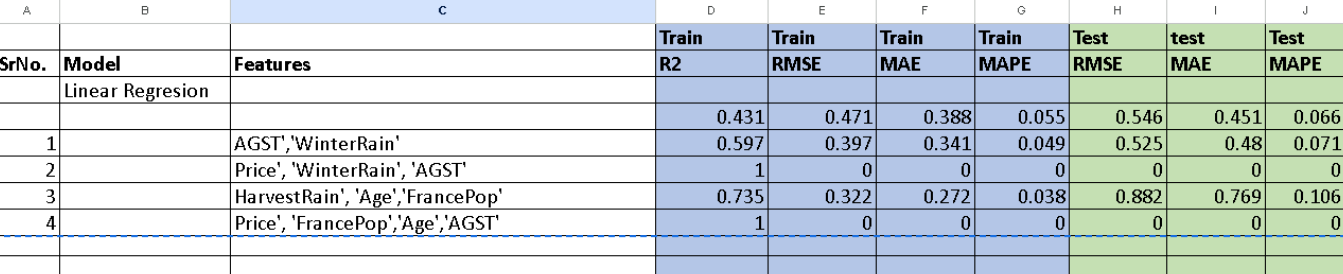